In [62]:
from lineRenderAlgo import Bresenham3D
import numpy as np
import raster_geometry as rg

In [63]:
#(x1, y1, z1) = (-1.2, 1.4, 1.3)
#(x2, y2, z2) = (5.1, 3.2, -1.3)
#ListOfPoints = Bresenham3D(x1, y1, z1, x2, y2, z2)
#print(ListOfPoints)


In [64]:
center = [0,0,0]
box_length = 11
source = [-10,0,0]
image = [50,0,0]
image_height = 101

box = np.zeros((box_length,box_length,box_length))


In [65]:
circle = rg.circle(101, 10)
circle = circle.astype(int)

lines = []

dist = 50
x_start = 50
y_start = 50

for x in range(0, 101):
  for y in range(0, 101):
    if (circle[x, y] == 1):
      #map coordinates
      lines.append((dist, x_start - x, y_start-y))



In [66]:
all_lineboxes = Bresenham3D(-10, 0, 0, 50, 10, 0)

actual_linebox = []
for i,data in enumerate(all_lineboxes):
  x = data[0]
  y = data[1]
  z = data[2] 
  if (-5 <= x <= 5 and -5 <= y <= 5 and -5 <= z <= 5):
    actual_linebox.append((x,y,z))
    

print(actual_linebox)




[(-5, 1, 0), (-4, 1, 0), (-3, 1, 0), (-2, 1, 0), (-1, 2, 0), (0, 2, 0), (1, 2, 0), (2, 2, 0), (3, 2, 0), (4, 2, 0), (5, 3, 0)]


In [67]:
#get all points within square
allPoints_list = []

for i, points in enumerate(lines):
  all_lineboxes = Bresenham3D(-10, 0, 0, 50, points[1], points[2])
  
  for i, data in enumerate(all_lineboxes):
    x = data[0]
    y = data[1]
    z = data[2]
    if (-5 <= x <= 5 and -5 <= y <= 5 and -5 <= z <= 5):
      allPoints_list.append((x, y, z))

In [68]:
#loop all points and map to match the square 
x_start2 = 5
y_start2 = 5
z_start2 = 5
for i,data in enumerate(allPoints_list):
  x = data[0] + x_start2
  y = data[1] + y_start2
  z = data[2] + z_start2
  box[x,y,z] = 1


In [69]:
import pyvista as pv

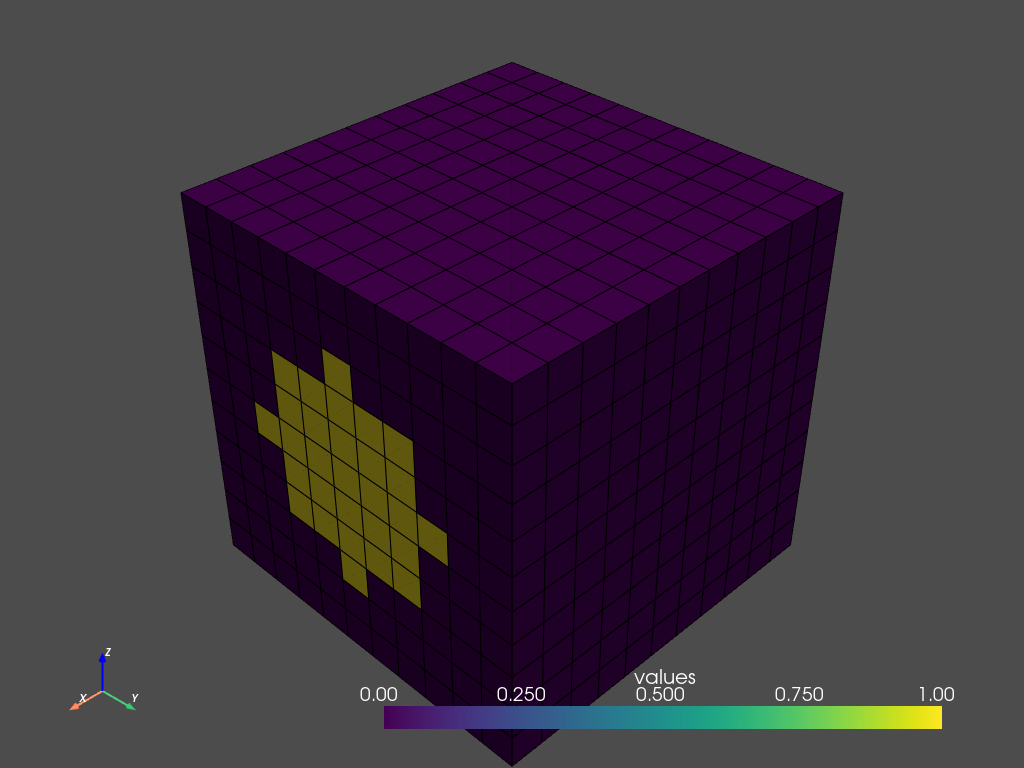

In [70]:
# Create the spatial reference
#https: // docs.pyvista.org/examples/00-load/create-uniform-grid.html#
grid = pv.UniformGrid()

# Set the grid dimensions: shape + 1 because we want to inject our values on
#   the CELL data
grid.dimensions = np.array(box.shape) + 1

# Edit the spatial reference
grid.origin = (100, 33, 55.6)  # The bottom left corner of the data set
grid.spacing = (1, 1, 1)  # These are the cell sizes along each axis

# Add the data values to the cell data
grid.cell_data["values"] = box.flatten(order="F")  # Flatten the array!

# Now plot the grid!
grid.plot(show_edges=True,jupyter_backend='static')


In [71]:
plotter = pv.Plotter(window_size=(600, 400))
plotter.background_color = 'w'
plotter.enable_anti_aliasing()
plotter.add_mesh(grid, show_edges=True)
plotter.show(jupyter_backend='pythreejs')


Renderer(camera=PerspectiveCamera(aspect=1.5, children=(DirectionalLight(intensity=0.25, position=(0.0, 0.0, 1…

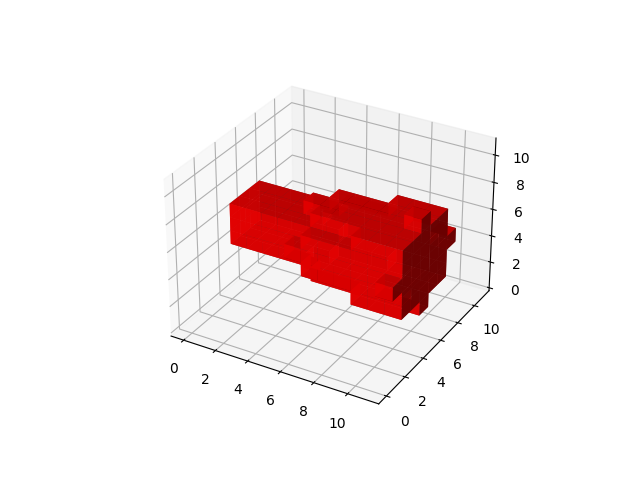

In [89]:
# Import libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

%matplotlib widget

# Create axis
axes = [11, 11, 11]

# Create Data
data = box #np.ones(axes, dtype=np.bool)

# Controll Tranperency
alpha = 0.9

# Control colour
colors = np.empty(axes + [4], dtype=np.float32)

colors[:] = [1, 0, 0, alpha]  # red

# Plot figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Voxels is used to customizations of the
# sizes, positions and colors.
ax.voxels(data, facecolors=colors)


plt.ion 
plt.show()


In [86]:
#try to rotate box
from scipy.ndimage import rotate as SR

box2 = np.copy(box)
box_rot = SR(box2,90)

box_rot = np.where(box_rot == 0, 0, 1)

print(box_rot)


[[[0 0 1 ... 1 0 0]
  [0 0 1 ... 1 0 0]
  [0 0 1 ... 1 0 0]
  ...
  [0 0 1 ... 1 0 0]
  [0 0 1 ... 1 0 0]
  [0 0 1 ... 1 0 0]]

 [[0 0 1 ... 1 0 0]
  [0 0 1 ... 1 0 0]
  [0 0 1 ... 1 0 0]
  ...
  [0 0 1 ... 1 0 0]
  [0 0 1 ... 1 0 0]
  [0 0 1 ... 1 0 0]]

 [[0 0 1 ... 1 0 0]
  [0 0 1 ... 1 0 0]
  [0 0 1 ... 1 0 0]
  ...
  [0 0 1 ... 1 0 0]
  [0 0 1 ... 1 0 0]
  [0 0 1 ... 1 0 0]]

 ...

 [[0 0 1 ... 1 0 0]
  [0 0 1 ... 1 0 0]
  [0 0 1 ... 1 0 0]
  ...
  [0 0 1 ... 1 0 0]
  [0 0 1 ... 1 0 0]
  [0 0 1 ... 1 0 0]]

 [[0 0 1 ... 1 0 0]
  [0 0 1 ... 1 0 0]
  [0 0 1 ... 1 0 0]
  ...
  [0 0 1 ... 1 0 0]
  [0 0 1 ... 1 0 0]
  [0 0 1 ... 1 0 0]]

 [[0 0 1 ... 1 0 0]
  [0 0 1 ... 1 0 0]
  [0 0 1 ... 1 0 0]
  ...
  [0 0 1 ... 1 0 0]
  [0 0 1 ... 1 0 0]
  [0 0 1 ... 1 0 0]]]


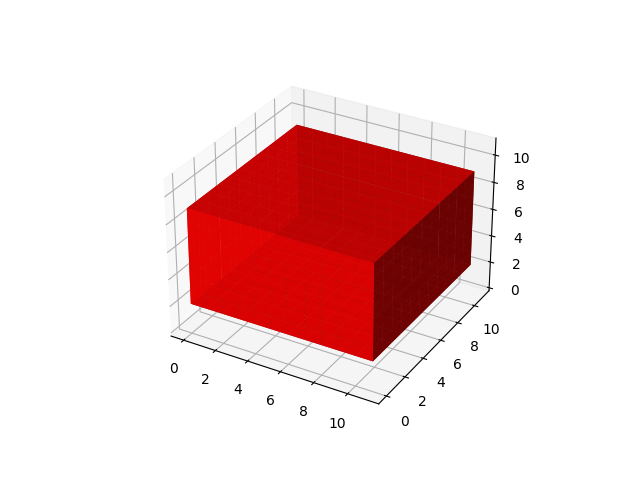

In [87]:

%matplotlib widget

# Create axis
axes = [11, 11, 11]

# Create Data
data = box_rot  # np.ones(axes, dtype=np.bool)

# Controll Tranperency
alpha = 0.9

# Control colour
colors = np.empty(axes + [4], dtype=np.float32)

colors[:] = [1, 0, 0, alpha]  # red

# Plot figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Voxels is used to customizations of the
# sizes, positions and colors.
ax.voxels(data, facecolors=colors)


plt.ion
plt.show()
